# Liver_Patient_Prediction

### Objective :- Our main target is to identify/predict whether the partient has an anomaly or abnormal functioning of liver

### Data preparation:-Importing dataset,domain analysis,data cleaning,all statistical summery,Outlier detection,EDA-univariate, bivariate, multivariate analysis of features, with various graphical representation.

### Machine Learning:-Data scaling,train test split,Used classification models using Hyperparameter with balanced Dataset (SMOTE) Analysis,graphical representation,ROC &AUC.

## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [13]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [14]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Assigning Features /Columns names

In [19]:
features=['age','gender','TB','DB','AAP','sgpt','sgot','TP','albumin','agr','Results']
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',names=features)
data.head()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Checking File Size

In [21]:
data.shape

(583, 11)

# Understanding of Features :-  

## Domain analysis

### This is a small dataset contains 583 records with 11 features, also unbalanced dataset.*

### *The features given are age, gender, Total bilirubin(TB), Direct bilirubin(DB), Alkaline phosphaotase(AAP), Alamine Aminotransferase(sgpt),Aspartate Aminotransferase(sgot),Total protiens(TP), Albumin, Albumib and globulin ration(agr), and Results.*

### *Bilirubin- A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*
### *For adults over 18, normal total bilirubin can be up to 1.2 milligrams per deciliter (mg/dl) of blood. For those under 18, the normal level will be will be 1 mg/dl. Normal results for conjugated (direct) bilirubin should be less than 0.3 mg/dl.*
### *Total Bilirubin(TB):-Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*

### *Direct Bilirubin(DB) :-Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect.*

### *Alkaline_Phosphotase(AAP) :- Alkaline phosphatase (AAP) is an enzyme that is present in many parts of the body, but it is primarily found in the liver, bones, intestine, and kidneys. Alkaline phosphatase testing measures the amount of this enzyme in the blood.The normal level of AAP is 20 to 140IU/L.*
### Higher-than-normal levels of AAP in your blood may indicate a problem with your liver or gallbladder.*
### *Alanine aminotransferase(sgpt)-It is usually referred to as sgpt, is an enzyme that is concentrated primarily in the liver.The normal range is 4 to 36 U/L.*
### High levels of sgpt can be a result of damage or injury to cells. Because sgpt is most concentrated in the liver.*
### *Aspartate aminotransferase(sgot) is an enzyme. Enzymes are types of proteins that enable most bodily processes. sgot exists mostly in the liver, but it is found in numerous tissues in the body.The normal range is 8 to 33 U/L.*
### High levels of sgot in the blood may indicate liver diseases.*
### *Total Protien(TP) :-The total protein test measures the total amount albumin and globulin in your body.*
### *The normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L.A high total protein level could indicate dehydration.*
### *Albumin_and_Globulin_Ratio	(agr) -High A/G ratio :- This can be a sign of disease in your liver, kidney.*
### *Albumin/Globulin ratio between 1.1 and 2.5 is considered normal.*


## Data Cleaning

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   AAP      583 non-null    int64  
 5   sgpt     583 non-null    int64  
 6   sgot     583 non-null    int64  
 7   TP       583 non-null    float64
 8   albumin  583 non-null    float64
 9   agr      579 non-null    float64
 10  Results  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Statistical Summery

In [31]:
data.describe()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [33]:
data['Results']=data['Results'].replace(2,0)
data.tail()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [35]:
data.Results.value_counts()

Results
1    416
0    167
Name: count, dtype: int64

## Checking the datatypes of each column

In [38]:
data.dtypes

age          int64
gender      object
TB         float64
DB         float64
AAP          int64
sgpt         int64
sgot         int64
TP         float64
albumin    float64
agr        float64
Results      int64
dtype: object

In [40]:
data.columns

Index(['age', 'gender', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'albumin',
       'agr', 'Results'],
      dtype='object')

## Checking For NULL values

In [43]:
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
AAP        0
sgpt       0
sgot       0
TP         0
albumin    0
agr        4
Results    0
dtype: int64

## Drop the missing values

In [46]:
data.dropna(inplace=True)

In [48]:
#data=data[-data.duplicated(subset=None,keep='first')]

In [50]:
data.drop(data[data['TB']>50].index)
data.drop(data[data['DB']>15].index)
#data.drop(data[data['AAP']>2000].index)
data.drop(data[data['sgpt']>1500].index)
data.drop(data[data['sgot']>2000].index)
#data.drop(data[data['agr']>2.5].index)
print(data.shape)

(579, 11)


In [52]:
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
AAP        0
sgpt       0
sgot       0
TP         0
albumin    0
agr        0
Results    0
dtype: int64

## Assinging new index for gender column to numeric

In [55]:
data['Sex']=pd.get_dummies(data['gender'],prefix='Sex',drop_first=True)
data.drop('gender',axis=1,inplace=True)

In [57]:
data.head()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results,Sex
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,True


### Dataset Contains Higher Numbers Of Liver Patients

##  Graphical Analysis

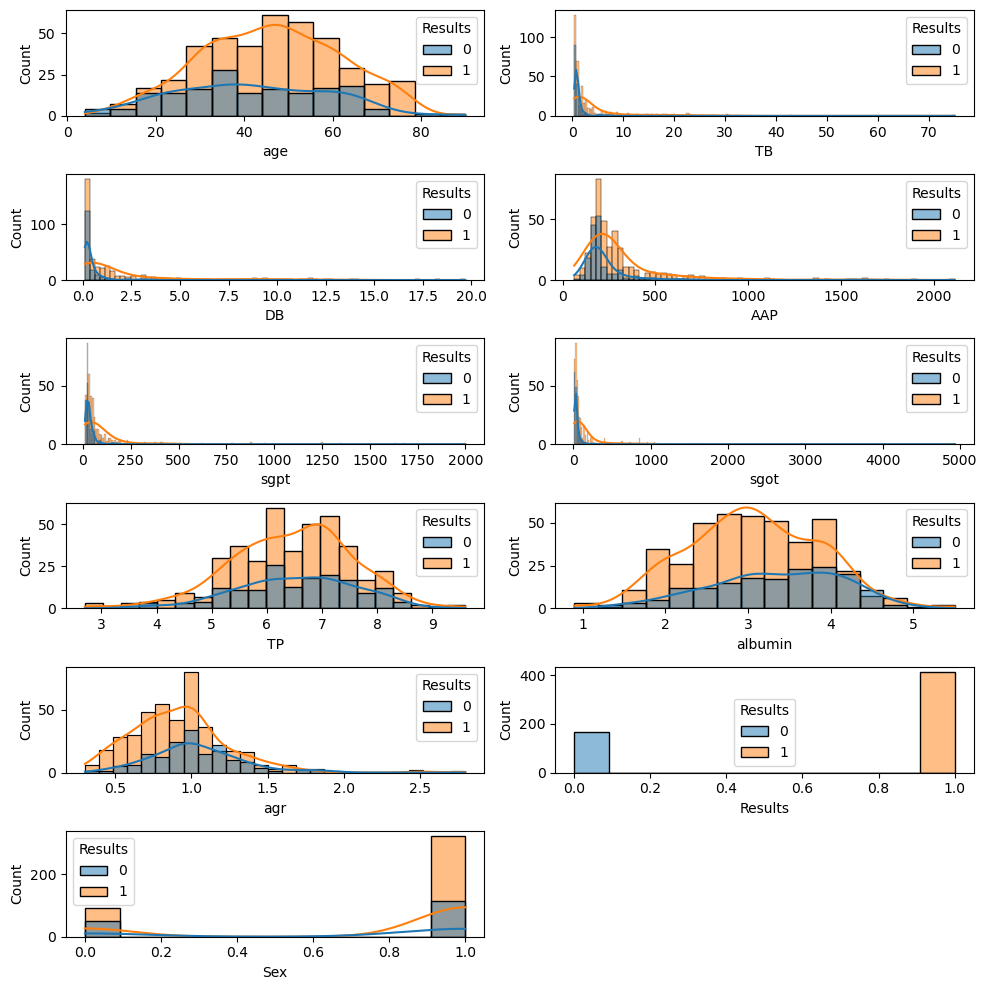

In [61]:
fig=plt.figure(figsize=(10,10))
plotnumber=1
for column in data.columns:
    plt.subplot(6,2,plotnumber)
    sns.histplot(x=column,data=data,hue='Results',kde=True)
    plotnumber+=1
plt.tight_layout()

In [62]:
RS=data.Results.value_counts()
RS

Results
1    414
0    165
Name: count, dtype: int64

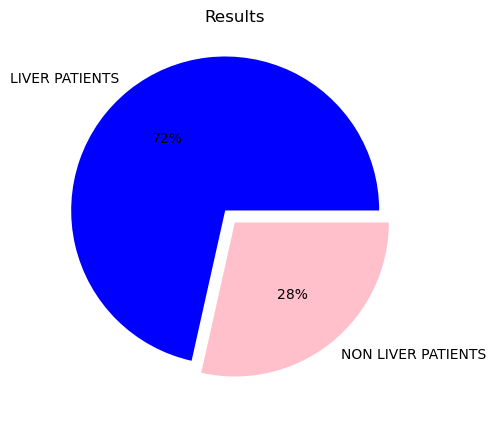

In [63]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,5
plt.pie(RS,[0.1,0],colors=['blue','pink'],labels=['LIVER PATIENTS','NON LIVER PATIENTS'],autopct='%1.0f%%')
plt.title("Results")
plt.show()

In [64]:
GN=data.Sex.value_counts()
GN

Sex
True     439
False    140
Name: count, dtype: int64

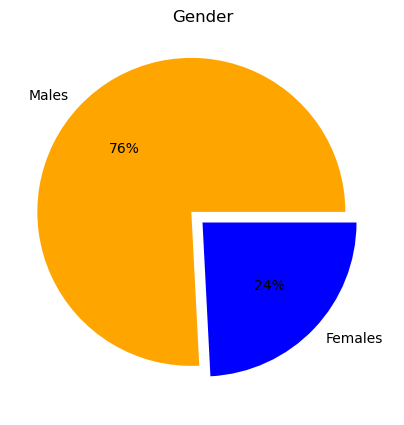

In [65]:
rcParams['figure.figsize'] = 5,5
plt.pie(GN,[0.1,0],colors=['Orange','Blue'],labels=['Males','Females'],autopct='%1.0f%%')
plt.title("Gender")
plt.show()

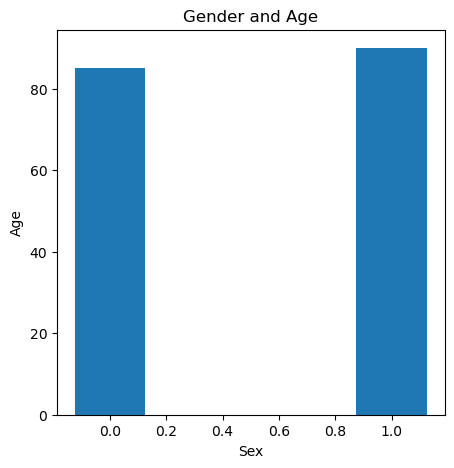

In [66]:
## Relation between Sex and Age:-
plt.bar(data.Sex,data.age,width=0.25)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Gender and Age')
plt.show()

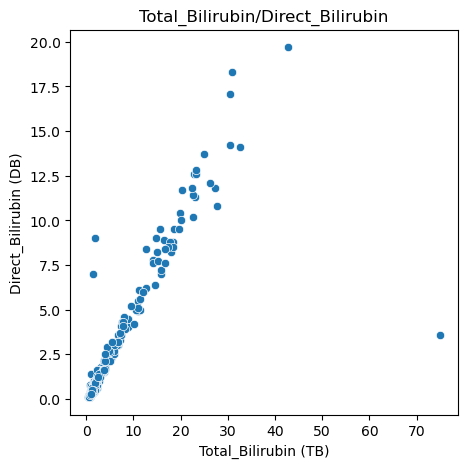

In [67]:
## Relation between TB and DB;-
sns.scatterplot(x=data.TB,y=data.DB)
plt.xlabel("Total_Bilirubin (TB)")
plt.ylabel("Direct_Bilirubin (DB)")
plt.title("Total_Bilirubin/Direct_Bilirubin")
plt.show()

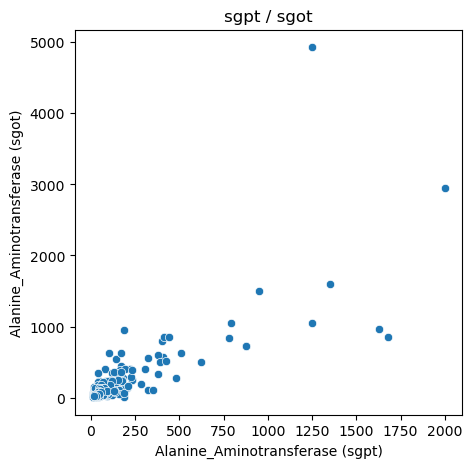

In [68]:
## Relation between sgpt and sgot:-
sns.scatterplot(x=data.sgpt,y=data.sgot)
plt.ylabel("Alanine_Aminotransferase (sgot)")
plt.xlabel("Alanine_Aminotransferase (sgpt)")
plt.title("sgpt / sgot")
plt.show()

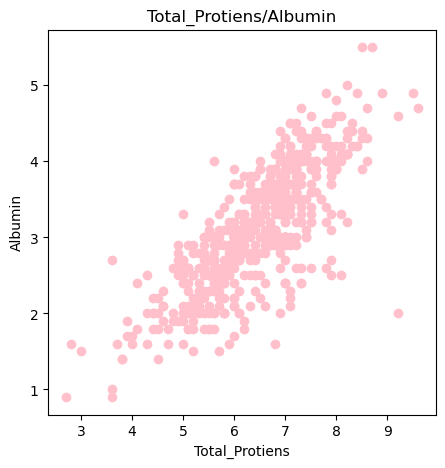

In [69]:
## Relation between TP and albumin:-
plt.scatter(x=data.TP, y=data.albumin, color ='pink')
plt.xlabel("Total_Protiens")
plt.ylabel("Albumin")
plt.title("Total_Protiens/Albumin")
plt.show()

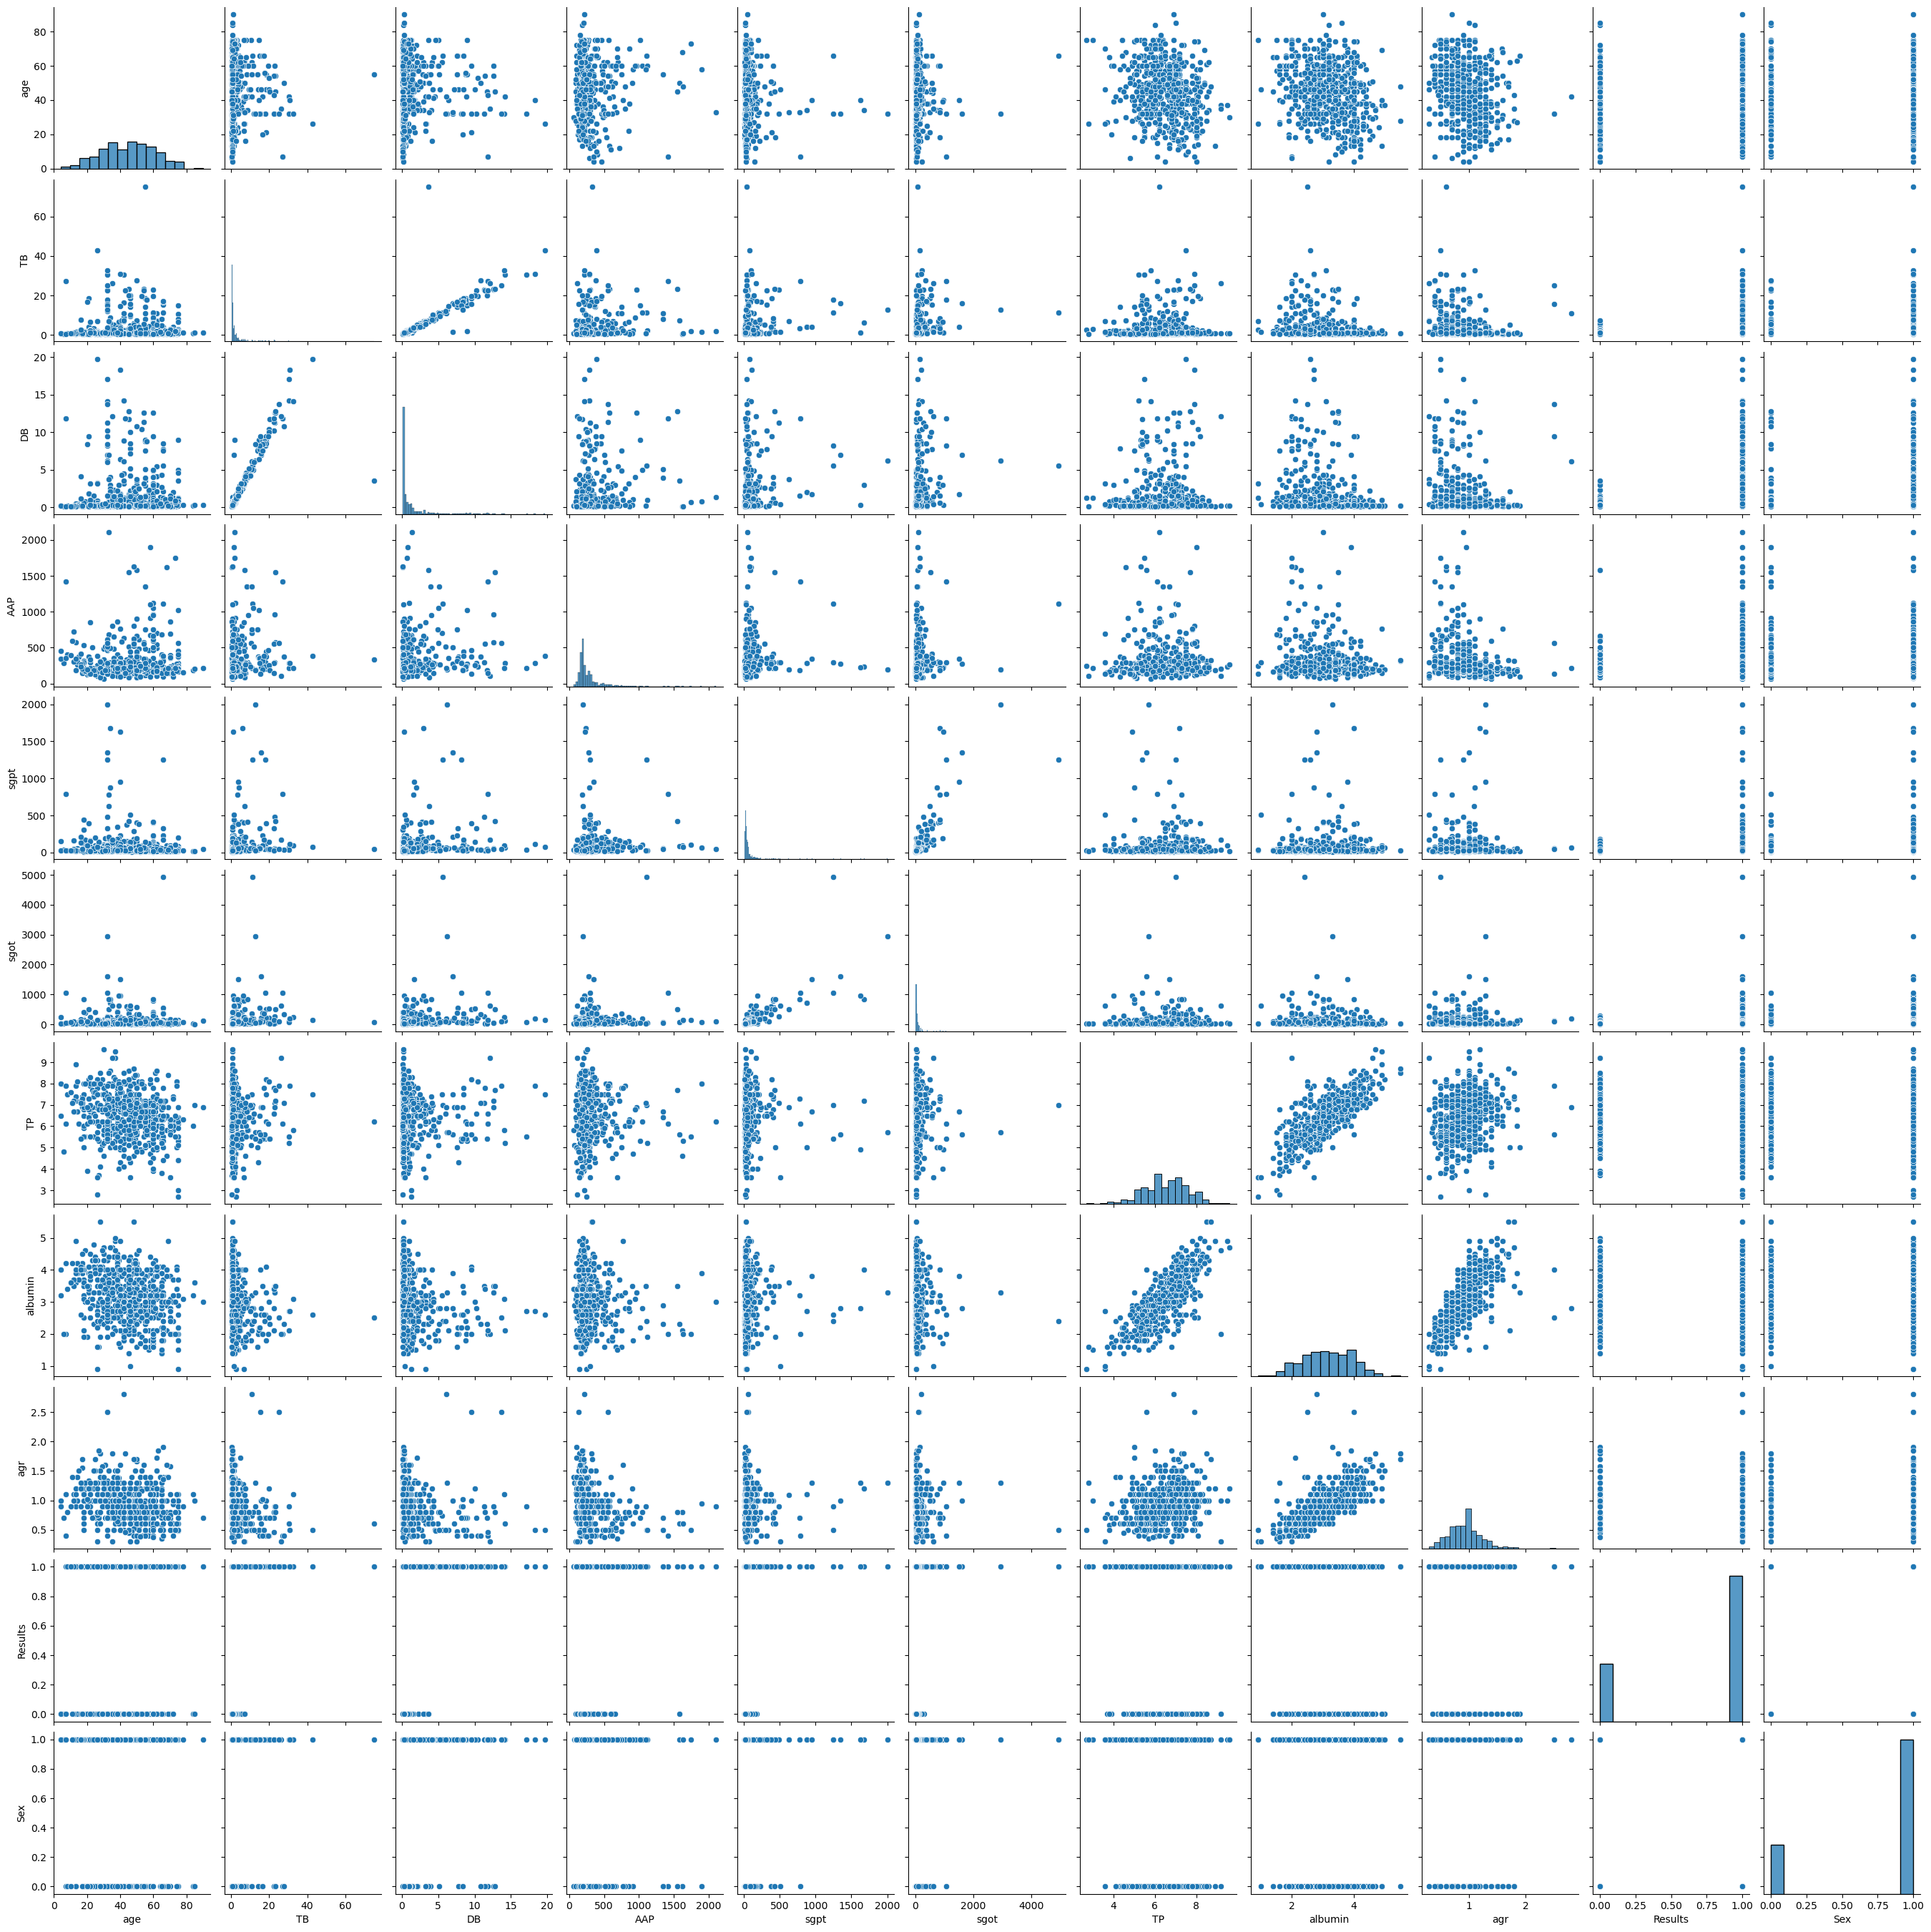

In [70]:
sns.pairplot(data)

## Checking For Outlier using Boxplot

<Axes: xlabel='variable', ylabel='value'>

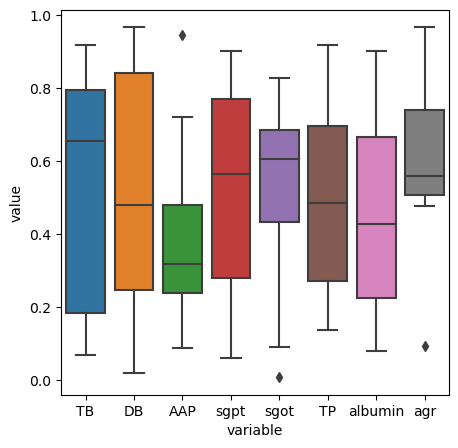

In [72]:
df = pd.DataFrame(data = np.random.random(size=(10,8)), columns =['TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'albumin','agr',])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

## Checking for Correlation

In [74]:
data.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results,Sex
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,0.133164,0.055881
TB,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,0.220218,0.088068
DB,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,0.246273,0.099160
AAP,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,0.183363,-0.029368
sgpt,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,0.163117,0.081339
sgot,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,0.151834,0.079421
TP,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,-0.033614,-0.095149
albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,-0.159770,-0.095579
agr,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131,-0.003424
Results,0.133164,0.220218,0.246273,0.183363,0.163117,0.151834,-0.033614,-0.159770,-0.163131,1.000000,0.081349


## Heatmap ( Showing Correlation b/w each others)

<Axes: >

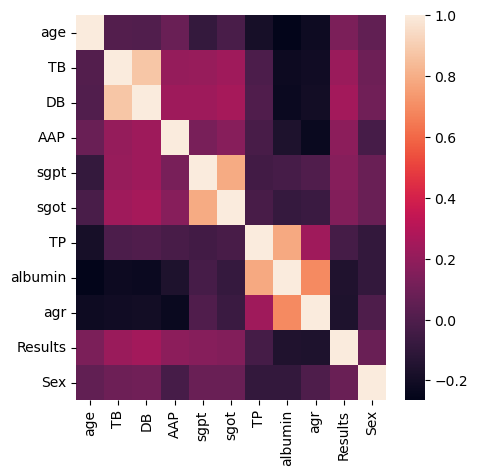

In [76]:
sns.heatmap(data.corr())

In [77]:
corr_matrix=data.corr().round(2)
corr_matrix['Results'].sort_values(ascending=False)

Results    1.00
DB         0.25
TB         0.22
AAP        0.18
sgpt       0.16
sgot       0.15
age        0.13
Sex        0.08
TP        -0.03
albumin   -0.16
agr       -0.16
Name: Results, dtype: float64

## Splitting Data Into X and Y:-

In [79]:
x=data.drop(['Results'],axis=1)
y=data['Results']

In [80]:
Non_Liver_patients=data[data['Results']==0]
liver_patients=data[data['Results']==1]

In [81]:
print(liver_patients.shape)

(414, 11)


In [82]:
print(Non_Liver_patients.shape)

(165, 11)


## Balancing the dataset by using SMOTE Technique:-

In [101]:
from imblearn.over_sampling import SMOTE

In [103]:
smote=SMOTE()

In [105]:
x_smote,y_smote=smote.fit_resample(x,y)

In [107]:
x_smote.shape

(828, 10)

In [109]:
y_smote.shape

(828,)

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.30,random_state=10)

## MODEL CREATIONS:-

## Random Forest Classifer with Hyperparameter tuning

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':range(1,50,1),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

In [119]:
tuning = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='f1')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


({'criterion': 'entropy', 'max_features': None, 'n_estimators': 15},
 0.7947416391733925)

In [120]:
classifier=RandomForestClassifier(n_estimators=85,criterion='gini',random_state=10,max_features='sqrt')

In [121]:
model=classifier.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train,y_train,cv=10)
print(score)

[0.82758621 0.77586207 0.74137931 0.72413793 0.84482759 0.82758621
 0.86206897 0.65517241 0.82758621 0.73684211]


In [123]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')


Max Accuracy : 86.21 %
Avg Accuracy : 78.23 %
Avg Deviaton : 6.3 %


In [124]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.797682076446281


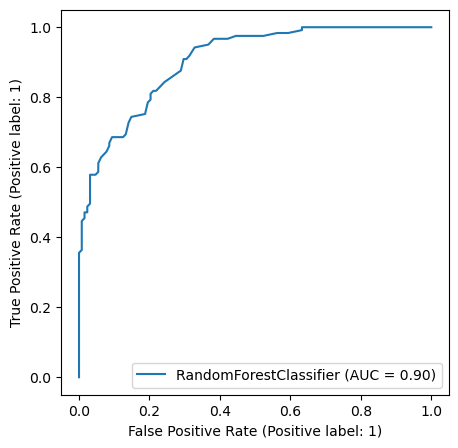

In [129]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,x_test,y_test)

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix (y_test,y_pred))
print(classification_report(y_test,y_pred))

[[109  19]
 [ 31  90]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       128
           1       0.83      0.74      0.78       121

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



In [133]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE = ',mse)
print('RMSE = ',rmse)

MSE =  0.20080321285140562
RMSE =  0.4481107149482208


## Logistic Regression with Hyperparameter tuning

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=10)

In [138]:
x_tra=x_train
x_tes=x_test

In [140]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_tra=sc.fit_transform(x_tra)
x_tes=sc.transform(x_tes)

In [142]:
from sklearn.linear_model import LogisticRegression

In [144]:
param_grid=[{'max_iter': range(1,50,5),'solver': ['liblinear','sage','newton-cg','sag','lbfgs']}]

In [146]:
from sklearn.model_selection import GridSearchCV
tuning= GridSearchCV(estimator =LogisticRegression(),param_grid=param_grid,cv=5,verbose=True,n_jobs=-1,scoring='f1')
tuning.fit(x_tra,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


({'max_iter': 1, 'solver': 'liblinear'}, 0.8417064192578726)

In [147]:
model=LogisticRegression(max_iter=12,solver='newton-cg',random_state=10)
model.fit(x_tra,y_train)
y_pred = model.predict(x_tes)

In [148]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_tra,y_train,cv=10)
print(score)

[0.63829787 0.65957447 0.76595745 0.7826087  0.7826087  0.65217391
 0.73913043 0.69565217 0.73913043 0.73913043]


In [152]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 78.26 %
Avg Accuracy : 71.94 %
Avg Deviaton : 5.15 %


In [154]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.5767565767565768


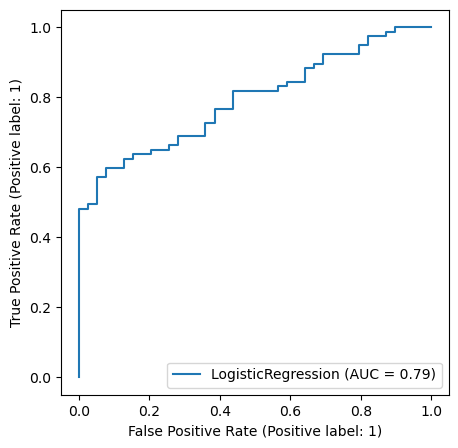

In [158]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,x_tes,y_test)

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix (y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7 32]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.78      0.18      0.29        39
           1       0.70      0.97      0.82        77

    accuracy                           0.71       116
   macro avg       0.74      0.58      0.55       116
weighted avg       0.73      0.71      0.64       116



In [162]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE = ',mse)
print('RMSE = ',rmse)

MSE =  0.29310344827586204
RMSE =  0.5413902920037097


## KNN with Hyperparameter tuning

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.20,random_state=10)

In [167]:
from sklearn.preprocessing import StandardScaler
x_tr=x_train
x_te=x_test
sc=StandardScaler()
x_tra=sc.fit_transform(x_tr)
x_tes=sc.transform(x_te)

In [169]:
param_grid=[{'n_neighbors': range(1,50,1),'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'p': [0,1,2,3]}]

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
from sklearn.model_selection import GridSearchCV
tuning = GridSearchCV(estimator= KNeighborsClassifier(),param_grid=param_grid,cv=5,verbose=True,n_jobs=-1,scoring='f1')
tuning.fit(x_tr,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits


({'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'},
 0.7827888202479633)

In [174]:
model=KNeighborsClassifier(n_neighbors=1,p=2,algorithm='auto',weights='uniform')
model.fit(x_tr,y_train)
y_pred= model.predict(x_te)

In [175]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_tr,y_train,cv=10)
print(score)

[0.85074627 0.76119403 0.72727273 0.81818182 0.77272727 0.78787879
 0.81818182 0.81818182 0.8030303  0.78787879]


In [176]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 85.07 %
Avg Accuracy : 79.45 %
Avg Deviaton : 3.33 %


In [177]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.8121278140885984


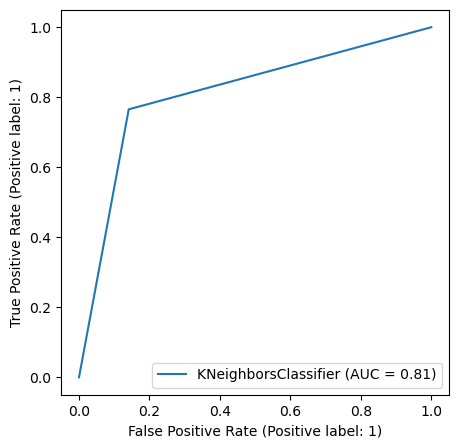

In [178]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,x_te,y_test)

## Conclusion

### Random Forest Classifier With Hyperparmeter Tuning give best accuracy of 86.21%.